# Blake Conrad

## Final Project | Implement Interior Point Algorithm

### Algorithm Implemented: Primal Affine Scaling Algorithm (Lecture 10)

Import Numerical Computing Environment Packages

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# Problem 1:

Reproduce example in Lecture 10 notes using Primal Affine Scaling Algorithm

In [2]:
A = np.matrix([[1, -1, 1, 0],
               [0, 1 , 0, 1]])
b = np.array([15, 15])
c = np.array([-2, 1, 0, 0])
N = A.shape[0]
M = A.shape[1]
print("A.shape{}".format(A))
print("b.shape {}".format(b))
print("c.shape {}".format(c))
print("{} constraints".format(N))
print("{} dimensions".format(M))



A.shape[[ 1 -1  1  0]
 [ 0  1  0  1]]
b.shape [15 15]
c.shape [-2  1  0  0]
2 constraints
4 dimensions


In [23]:
def primal_interior_feasible(x):
    return (x > 0).all()

def make_feasible(z):
    z[z < 0 ] = max(0.1, z.max())
    return z

def dual_interior_feasible(s):
    return (s > 0).all()

def get_IBFS(dim):
    x0 = np.random.randn(dim)
    it=0
    while not primal_interior_feasible(x0):
        if it % 100000 == 0:
            print(it)
        x0 = np.random.randn(dim)
        #x0 = (np.diag(x0).dot(A.T).dot(np.linalg.inv(A.dot(np.diag(x0)**2).dot(A.T))))*np.diag(x0).dot(x0)
        it+=1
    print("Took {} iterations to find IBFS.".format(it))
    return x0

def get_dual(X):
    w = np.linalg.inv(A.dot(X**2).dot(A.T)).dot(A).dot(X**2).dot(c)
    s = c - A.T.dot(w.T).T
    return w, s

def get_duality_gap(x,s):
    return x.dot(s.T)

def interior_point(A0,b0,c0,M0,etol=0.0001,alpha=0.1):
    
    # Get IBFS
    x0 = get_IBFS(M0)
    
    # Diagonalize
    X0 = np.diag(x0)
    
    # Get dual variables and dual slack
    w0, s0 = get_dual(X0)
    
    # Make dual feasible
    if not dual_interior_feasible(s0):
        s0 = make_feasible(s0)
    
    # Get initial duality gap
    gap = get_duality_gap(x0, s0).tolist()[0][0]
    it = 0
    gaps=[]
    iters=[]
    zs=[]
    while gap > etol:

        # Get primal scaling direction of improvement
        dy = -X0.dot(s0.T)

        # Get next best point
        x0 = x0 + alpha*X0.dot(dy).T

        # Make primal feasible
        if not primal_interior_feasible(x0):
            x0 = make_feasible(x0)

        # Get dual slack
        X0 = np.diag(np.asarray(x0)[0])
        w0, s0 = get_dual(X0)

        # Make dual feasible
        if not dual_interior_feasible(s0):
            s0 = make_feasible(s0)

        # Get duality gap
        gap = get_duality_gap(x0, s0).tolist()[0][0]
        it += 1
        z = x0.dot(c)
        
        # Record data
        gaps.append(gap)
        iters.append(it)
        zs.append(z)
        
        if it % 1000 == 0:   
            print("Iteration {}, Duality Gap {}".format(it, gap))


    print("Final Duality Gap {}".format(gap))
    print("Primal Variables {}".format(x0))
    print("Dual Slack Variables {}".format(s0))
    print("Dual Variables {}".format(w0))
    return x0,w0,s0,gaps,iters,zs




In [24]:
x0,w0,s0,gaps,iters, zs=interior_point(A,b,c,M,etol=0.001)

0
Took 1 iterations to find IBFS.
Iteration 1000, Duality Gap 0.03425861829071579
Iteration 2000, Duality Gap 0.017361653008219364
Iteration 3000, Duality Gap 0.011378950651640156
Iteration 4000, Duality Gap 0.008398904887942376
Iteration 5000, Duality Gap 0.006633691671674564
Iteration 6000, Duality Gap 0.005472145558514748
Iteration 7000, Duality Gap 0.004652078674576753
Iteration 8000, Duality Gap 0.0040432085940588945
Iteration 9000, Duality Gap 0.003573756228176588
Iteration 10000, Duality Gap 0.003201026022975759
Iteration 11000, Duality Gap 0.002898074495299789
Iteration 12000, Duality Gap 0.002647079511597501
Iteration 13000, Duality Gap 0.0024357916967707293
Iteration 14000, Duality Gap 0.002255519578785964
Iteration 15000, Duality Gap 0.002099928287631605
Iteration 16000, Duality Gap 0.0019642933072778006
Iteration 17000, Duality Gap 0.0018450204498907897
Iteration 18000, Duality Gap 0.0017393275318075855
Iteration 19000, Duality Gap 0.0016450278167341376
Iteration 20000, Dua

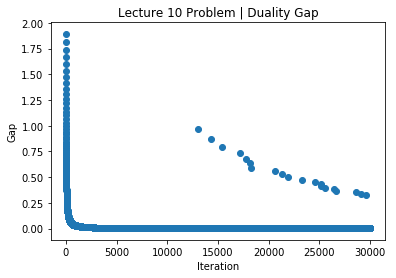

In [6]:
plt.scatter(iters,gaps)
plt.title("Lecture 10 Problem | Duality Gap")
plt.xlabel("Iteration")
plt.ylabel("Gap")
plt.show()

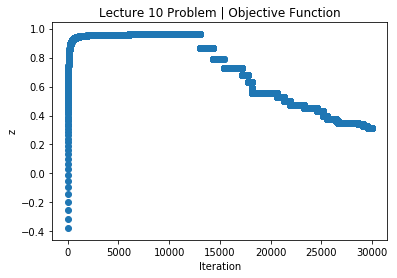

In [7]:
plt.scatter(iters,zs)
plt.title("Lecture 10 Problem | Objective Function")
plt.xlabel("Iteration")
plt.ylabel("z")
plt.show()

# Problem 2

Reproduce the blending problem

In [103]:
import scipy.io

In [ ]:
D = scipy.io.loadmat('BLEND.mat')


print("Saving data")
A = D["A"].todense()
b = D["b"].reshape(-1)
c = D["c"].reshape(-1)
lb = D["lbounds"]
ub = D["ubounds"]
N = A.shape[0]
M = A.shape[1]
print("Confirming data shapes")
print("A {}".format(A.shape))
print("b {}".format(b.shape))
print("c {}".format(c.shape))
print("lb {}".format(lb.shape))
print("ub {}".format(ub.shape))

In [ ]:
x0,w0,s0,gaps,iters,zs=interior_point(A,b,c,M,etol=0.01)


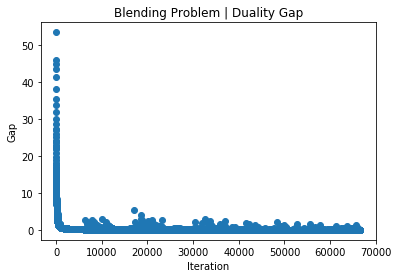

In [179]:
plt.scatter(iters,gaps)
plt.title("Blending Problem | Duality Gap")
plt.xlabel("Iteration")
plt.ylabel("Gap")
plt.show()

In [178]:
print("Final Solution {}".format(x0.dot(c)))

Final Solution [[3.02434323]]
